# Interpreting PCAs 


In [2]:
import pandas as pd
import geopandas as gpd
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
total = pd.read_csv("/data/uscuni-restricted/01_preprocessed_census/nadzsjd_vek_pohlavi_2021.csv", dtype={"nadzsjd":str})

In [4]:
total = total.iloc[:,12:14]
total

,nadzsjd,Obyvatelstvo celkem
0,1270600,0
1,1271590,0
2,3182130,0
3,3182640,0
4,50005401,977
...,...,...
21052,50029101,68
21053,50029102,666
21054,50029103,1997
21055,56844901,579


In [5]:
data = gpd.read_parquet("/data/uscuni-restricted/04_spatial_census/nadzsjd_pop_status_gender_2021.parquet")
data_total = pd.merge(
        data,
        total,
        on="nadzsjd",
        how="left",
    )

In [6]:
data_census = data_total.drop(data.columns[:13], axis=1)

In [7]:
data_sum = data_census.iloc[:,12:-2].sum(axis=1)

In [8]:
data_relative = data_census.drop(columns = "geometry")

In [9]:
cols_to_normalize = data_relative.columns.difference(['Obyvatelstvo celkem']) 
data_relative[cols_to_normalize] = data_relative[cols_to_normalize].div(data_relative['Obyvatelstvo celkem'], axis=0)

data_relative

,Obyvatelstvo - rodinný stav: svobodní - muži,Obyvatelstvo - rodinný stav: svobodní - ženy,"Obyvatelstvo - rodinný stav: ženatí, vdané - muži","Obyvatelstvo - rodinný stav: ženatí, vdané - ženy",Obyvatelstvo - rodinný stav: rozvedení - muži,Obyvatelstvo - rodinný stav: rozvedení - ženy,Obyvatelstvo - rodinný stav: ovdovělí - muži,Obyvatelstvo - rodinný stav: ovdovělí - ženy,Obyvatelstvo - rodinný stav: nezjištěno - muži,Obyvatelstvo - rodinný stav: nezjištěno - ženy,Obyvatelstvo celkem
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0.259980,0.195496,0.185261,0.162743,0.053224,0.066530,0.008188,0.059365,0.005118,0.004094,977
...,...,...,...,...,...,...,...,...,...,...,...
20688,0.294118,0.161765,0.205882,0.191176,0.014706,0.073529,0.000000,0.058824,0.000000,0.000000,68
20689,0.190691,0.172673,0.249249,0.252252,0.027027,0.039039,0.013514,0.054054,0.000000,0.001502,666
20690,0.215323,0.160741,0.237356,0.244367,0.042063,0.044567,0.011517,0.043065,0.000501,0.000501,1997
20691,0.243523,0.188256,0.217617,0.215889,0.034542,0.039724,0.013817,0.046632,0.000000,0.000000,579


In [10]:
data_relative = data_relative.dropna(axis=0)

In [11]:
data_relative

,Obyvatelstvo - rodinný stav: svobodní - muži,Obyvatelstvo - rodinný stav: svobodní - ženy,"Obyvatelstvo - rodinný stav: ženatí, vdané - muži","Obyvatelstvo - rodinný stav: ženatí, vdané - ženy",Obyvatelstvo - rodinný stav: rozvedení - muži,Obyvatelstvo - rodinný stav: rozvedení - ženy,Obyvatelstvo - rodinný stav: ovdovělí - muži,Obyvatelstvo - rodinný stav: ovdovělí - ženy,Obyvatelstvo - rodinný stav: nezjištěno - muži,Obyvatelstvo - rodinný stav: nezjištěno - ženy,Obyvatelstvo celkem
4,0.259980,0.195496,0.185261,0.162743,0.053224,0.066530,0.008188,0.059365,0.005118,0.004094,977
5,0.271768,0.218470,0.160950,0.146702,0.063325,0.068074,0.008971,0.043272,0.007388,0.010026,1895
6,0.260792,0.216440,0.148433,0.125961,0.086339,0.068007,0.011236,0.051449,0.015376,0.014784,1691
7,0.293001,0.228965,0.139613,0.133284,0.065153,0.068131,0.008935,0.035741,0.014520,0.009680,2686
8,0.274008,0.257789,0.137857,0.137004,0.051216,0.067435,0.005122,0.031157,0.018779,0.014511,2343
...,...,...,...,...,...,...,...,...,...,...,...
20688,0.294118,0.161765,0.205882,0.191176,0.014706,0.073529,0.000000,0.058824,0.000000,0.000000,68
20689,0.190691,0.172673,0.249249,0.252252,0.027027,0.039039,0.013514,0.054054,0.000000,0.001502,666
20690,0.215323,0.160741,0.237356,0.244367,0.042063,0.044567,0.011517,0.043065,0.000501,0.000501,1997
20691,0.243523,0.188256,0.217617,0.215889,0.034542,0.039724,0.013817,0.046632,0.000000,0.000000,579


In [12]:
scaler = StandardScaler()
data_relative = pd.DataFrame(scaler.fit_transform(data_relative),columns=data_relative.columns,index=data_relative.index)

In [13]:
data_relative

,Obyvatelstvo - rodinný stav: svobodní - muži,Obyvatelstvo - rodinný stav: svobodní - ženy,"Obyvatelstvo - rodinný stav: ženatí, vdané - muži","Obyvatelstvo - rodinný stav: ženatí, vdané - ženy",Obyvatelstvo - rodinný stav: rozvedení - muži,Obyvatelstvo - rodinný stav: rozvedení - ženy,Obyvatelstvo - rodinný stav: ovdovělí - muži,Obyvatelstvo - rodinný stav: ovdovělí - ženy,Obyvatelstvo - rodinný stav: nezjištěno - muži,Obyvatelstvo - rodinný stav: nezjištěno - ženy,Obyvatelstvo celkem
4,0.538101,0.297682,-0.475065,-0.915976,-0.047313,0.497578,-0.365292,0.085725,0.440582,0.533001,0.473141
5,0.763390,0.775235,-1.046460,-1.299748,0.276538,0.553019,-0.302918,-0.386504,0.753588,1.703804,1.457305
6,0.553637,0.733043,-1.340652,-1.795954,1.014471,0.550620,-0.122408,-0.146568,1.854918,2.642813,1.238602
7,1.169179,0.993405,-1.547953,-1.620765,0.335153,0.555072,-0.305768,-0.607480,1.736923,1.635405,2.305316
8,0.806197,1.592583,-1.589210,-1.531763,-0.111688,0.530071,-0.609695,-0.741994,2.324234,2.588964,1.937594
...,...,...,...,...,...,...,...,...,...,...,...
20688,1.190524,-0.403511,0.009607,-0.235734,-1.282333,0.748949,-1.017869,0.069825,-0.265043,-0.275038,-0.501374
20689,-0.786097,-0.176763,1.028876,1.225447,-0.887277,-0.489743,0.059104,-0.070124,-0.265043,0.021303,0.139726
20690,-0.315342,-0.424789,0.749345,1.036789,-0.405172,-0.291216,-0.099988,-0.392583,-0.196000,-0.176208,1.566657
20691,0.223602,0.147165,0.285401,0.355501,-0.646313,-0.465155,0.083285,-0.287903,-0.265043,-0.275038,0.046456


## Perform PCA

In [35]:
pca = PCA(n_components=7
         )
pca.fit(data_relative.iloc[:,:-1])
pca.explained_variance_ratio_

array([0.2832168 , 0.15675928, 0.13388011, 0.10415578, 0.09843583,
       0.08181688, 0.06838901])

In [36]:
np.cumsum(pca.explained_variance_ratio_)

array([0.2832168 , 0.43997608, 0.57385619, 0.67801196, 0.7764478 ,
       0.85826468, 0.92665369])

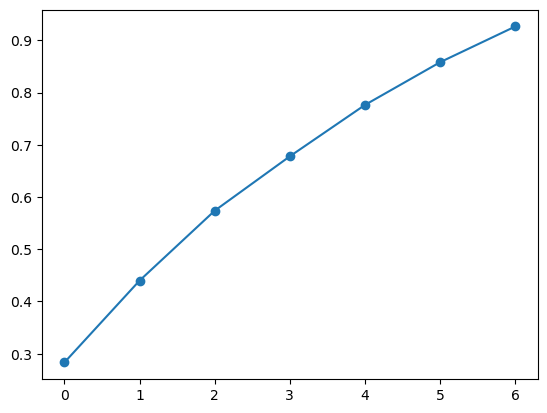

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')

In [38]:
# Compute Loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Convert to DataFrame for readability
loadings_df = pd.DataFrame(
    loadings.T,
    index=[f'PC{i+1}' for i in range(pca.explained_variance_.shape[0])],
    columns=data_relative.iloc[:,:-1].columns
)

In [39]:
loadings_df

,Obyvatelstvo - rodinný stav: svobodní - muži,Obyvatelstvo - rodinný stav: svobodní - ženy,"Obyvatelstvo - rodinný stav: ženatí, vdané - muži","Obyvatelstvo - rodinný stav: ženatí, vdané - ženy",Obyvatelstvo - rodinný stav: rozvedení - muži,Obyvatelstvo - rodinný stav: rozvedení - ženy,Obyvatelstvo - rodinný stav: ovdovělí - muži,Obyvatelstvo - rodinný stav: ovdovělí - ženy,Obyvatelstvo - rodinný stav: nezjištěno - muži,Obyvatelstvo - rodinný stav: nezjištěno - ženy
PC1,-0.545129,-0.376685,0.933111,0.950328,-0.456173,-0.531007,-0.011712,-0.007761,-0.270456,-0.236703
PC2,-0.424739,-0.539879,-0.038983,-0.055971,0.414130,0.342955,0.550777,0.697123,-0.106355,-0.037129
PC3,0.011825,-0.289867,0.147479,0.047274,-0.043841,-0.166364,0.045517,0.027004,0.784165,0.763811
PC4,0.025892,-0.413264,0.179656,0.099697,0.575413,0.304119,-0.467269,-0.404406,0.072542,-0.131159
PC5,0.698045,-0.507693,-0.028401,-0.067234,-0.053442,-0.356509,0.157863,0.090214,-0.020860,-0.265731
PC6,-0.039577,0.095302,0.056267,0.024373,0.231190,-0.089949,0.657546,-0.555748,0.021764,-0.023795
PC7,0.159798,-0.205390,0.037826,0.070354,-0.448225,0.564460,0.126918,-0.179239,-0.141144,0.148818


# Plot

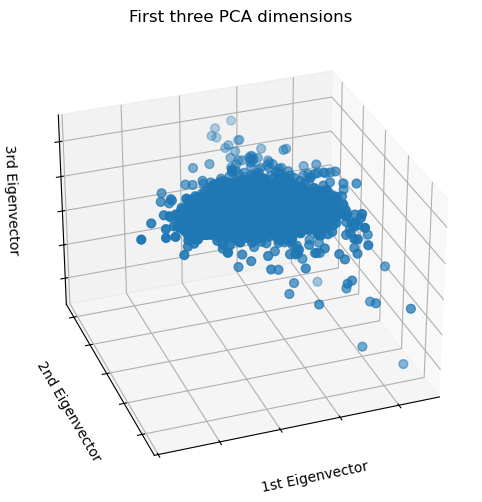

In [40]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = pca.fit_transform(data_relative.iloc[:,:-1])
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [41]:
pca_scores = pca.fit_transform(data_relative.iloc[:,:-1])

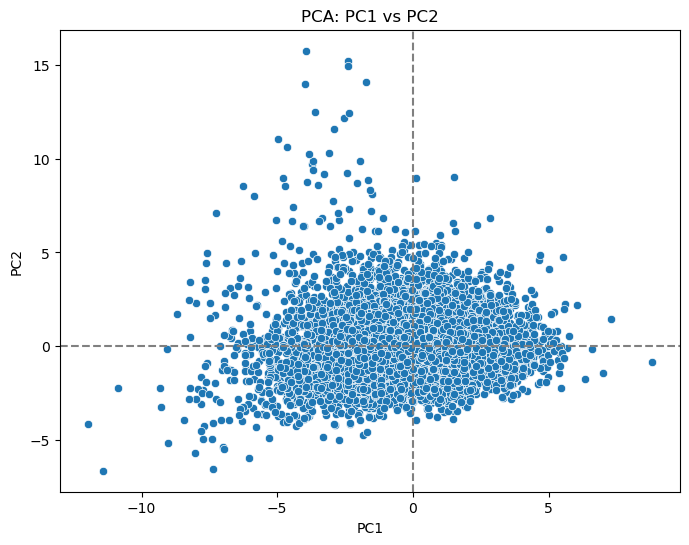

In [42]:
# Scatter plot of PC1 vs PC2
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_scores[:, 0], y=pca_scores[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: PC1 vs PC2")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

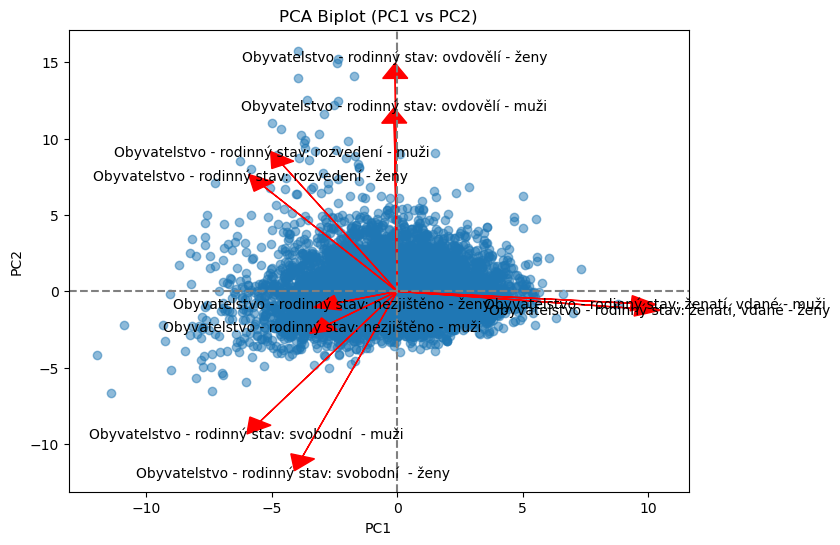

In [43]:
def biplot(pca, pca_scores, feature_names):
    plt.figure(figsize=(8,6))
    plt.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.5)
    scaling_factor1 = 10  # Adjust the scale of arrows
    scaling_factor2 = 20

    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, loadings[i, 0] * scaling_factor1, loadings[i, 1] * scaling_factor2, 
                 color='red', alpha=1, head_width=1, head_length=1)
        plt.text(loadings[i, 0] * scaling_factor1 * 1.1, loadings[i, 1] * scaling_factor2 * 1.1, 
                s=feature, color='black', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.title("PCA Biplot (PC1 vs PC2)")
    plt.show()

biplot(pca, pca_scores, data_relative.iloc[:,:-1].columns)

# Save PCs

In [44]:
pca.transform(data_relative)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Obyvatelstvo celkem


In [27]:
columns = ['pca_%i' % i for i in range(pca.explained_variance_.shape[0])]
df_pca  = pd.DataFrame(pca.transform(data_relative.iloc[:,:-1]), columns=columns, index=data_relative.iloc[:,:-1].index)

In [28]:
df_pca

,pca_0,pca_1,pca_2,pca_3
4,-1.309355,-0.300706,0.401259,-0.062301
5,-2.341240,-0.722595,1.151597,-0.158576
6,-3.217852,-0.266886,2.453562,-0.051851
7,-3.144740,-1.110197,1.637527,-0.155053
8,-3.230650,-1.689516,2.515000,-0.553181
...,...,...,...,...
20688,-0.223786,-0.816836,-0.353837,0.127312
20689,1.991174,-0.162711,0.156614,-0.314579
20690,1.458648,-0.234013,0.036040,0.292032
20691,0.657598,-0.598262,-0.256933,-0.379496


In [29]:
df_pca.to_parquet("/data/uscuni-restricted/05_pcs/nadzsjd_pop_status_gender_2021.parquet")